In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 30)
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"

In [2]:
data = pd.read_csv("C://Kiki/python_tutorial/train.csv")
data.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

In [3]:
data.columns = [column.lower().replace(" ","_").replace("-","_") for column in data.columns]

In [4]:
data.head()

row_id        order_id  order_date   ship_date       ship_mode customer_id  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     customer_name    segment        country             city       state  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   postal_code region       product_id         category sub_category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        product_name     sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9800 non-null   int64  
 1   order_id       9800 non-null   object 
 2   order_date     9800 non-null   object 
 3   ship_date      9800 non-null   object 
 4   ship_mode      9800 non-null   object 
 5   customer_id    9800 non-null   object 
 6   customer_name  9800 non-null   object 
 7   segment        9800 non-null   object 
 8   country        9800 non-null   object 
 9   city           9800 non-null   object 
 10  state          9800 non-null   object 
 11  postal_code    9789 non-null   float64
 12  region         9800 non-null   object 
 13  product_id     9800 non-null   object 
 14  category       9800 non-null   object 
 15  sub_category   9800 non-null   object 
 16  product_name   9800 non-null   object 
 17  sales          9800 non-null   float64
dtypes: float

In [6]:
data.describe()

row_id   postal_code         sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000

In [7]:
data.isna().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
dtype: int64

In [8]:
data[["customer_id","country","city","state","postal_code","region"]][data["postal_code"].isna()].head()

customer_id        country        city    state  postal_code region
2234    QJ-19255  United States  Burlington  Vermont          NaN   East
5274    SV-20785  United States  Burlington  Vermont          NaN   East
8798    VM-21685  United States  Burlington  Vermont          NaN   East
9146    CB-12535  United States  Burlington  Vermont          NaN   East
9147    CB-12535  United States  Burlington  Vermont          NaN   East

In [9]:
# leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers
data["postal_code"][(data["city"] == "Burlington") & (data["state"] == "Vermont")] = 5401
data["postal_code"] = data["postal_code"].astype("int").astype("str").str.zfill(5)
data[["customer_id","country","city","state","postal_code","region"]][(data["city"] == "Burlington") & (data["state"] == "Vermont")].head()

customer_id        country        city    state postal_code region
2234    QJ-19255  United States  Burlington  Vermont       05401   East
5274    SV-20785  United States  Burlington  Vermont       05401   East
8798    VM-21685  United States  Burlington  Vermont       05401   East
9146    CB-12535  United States  Burlington  Vermont       05401   East
9147    CB-12535  United States  Burlington  Vermont       05401   East

In [10]:
data[["order_date","ship_date"]] = data[["order_date","ship_date"]].astype("datetime64[ns]")
data["order_date"] = data["order_date"].dt.strftime("%d-%m-%Y")
data["ship_date"] = data["ship_date"].dt.strftime("%d-%m-%Y")
data[["order_date","ship_date"]] = data[["order_date","ship_date"]].astype("datetime64[ns]")
data["time_shipped"] = data["ship_date"] - data["order_date"]

In [11]:
data["weekday"] = data["order_date"].dt.day_name()
data["day"] = data["order_date"].dt.day
data["month"] = data["order_date"].dt.month_name()
data["year"] = data["order_date"].dt.year
data.head()

row_id        order_id order_date  ship_date       ship_mode customer_id  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     customer_name    segment        country             city       state  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

  postal_code region       product_id         category sub_category  \
0       42420  South  FUR-BO-10001798        Furniture    Bookcases   
1       42420  South  FUR-CH-10000454        Furniture       Chairs   
2       90036   West  OFF-LA-10000240  Office Supplies       Labels   
3       33311  South  FUR-TA-10000577        Furniture       Tables   
4       33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        product_name     sales time_shipped  \
0                  Bush Somerset Collection Bookcase  261.9600       3 days   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400       3 days   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200       4 days   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775       7 days   
4                     Eldon Fold 'N Roll Cart System   22.3680       7 days   

     weekday  day     month  year  
0  Wednesday    8  November  2017  
1  Wednesday    8  November  2017  
2     Monday   12      June  2017  
3    Tuesday   11   October  2016  
4    Tuesday   11   October  2016

In [12]:
data.dtypes

row_id                     int64
order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_id               object
customer_name             object
segment                   object
country                   object
city                      object
state                     object
postal_code               object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
time_shipped     timedelta64[ns]
weekday                   object
day                        int64
month                     object
year                       int64
dtype: object

In [13]:
plt.rcParams["figure.figsize"] = (10,4)
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"

# Ordering months and weekday properly so they are plotted in a logical way.
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
data["month"] = pd.CategoricalIndex(data["month"],categories=months,ordered=True)

weekday = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
data["weekday"] = pd.CategoricalIndex(data["weekday"],categories=weekday,ordered=True)

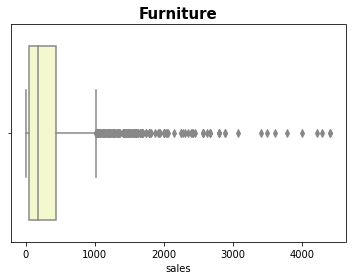

Number of upper outliers: 156


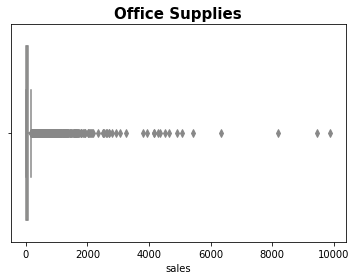

Number of upper outliers: 773


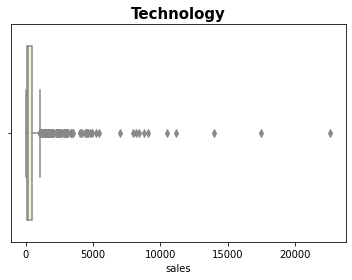

Number of upper outliers: 162


In [14]:
# OUTLIERS?
for i in data["category"].unique():
    sns.boxplot(x="sales",data=data[data["category"] == i],color="#FAFFC7")
    plt.title(i)
    plt.show()
    q1 = data["sales"][data["category"] == i].quantile(0.25)
    q3 = data["sales"][data["category"] == i].quantile(0.75)
    iqr = q3 - q1
    print("Number of upper outliers: {}".format(len(data["sales"][(data["category"] == i) & (data["sales"] > iqr + (1.5 * q3))])))

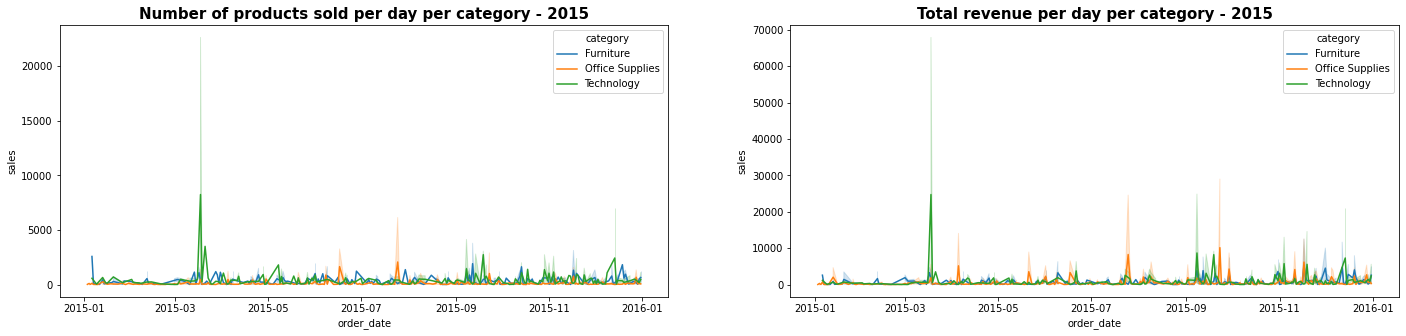

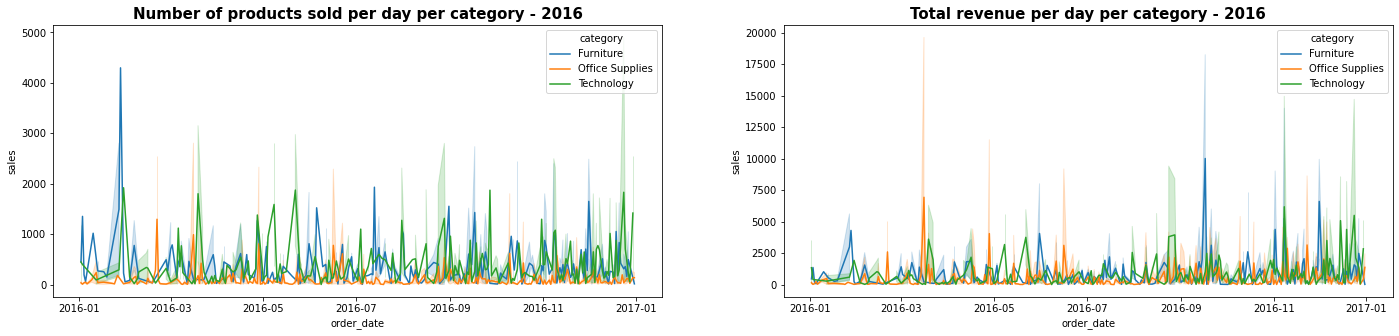

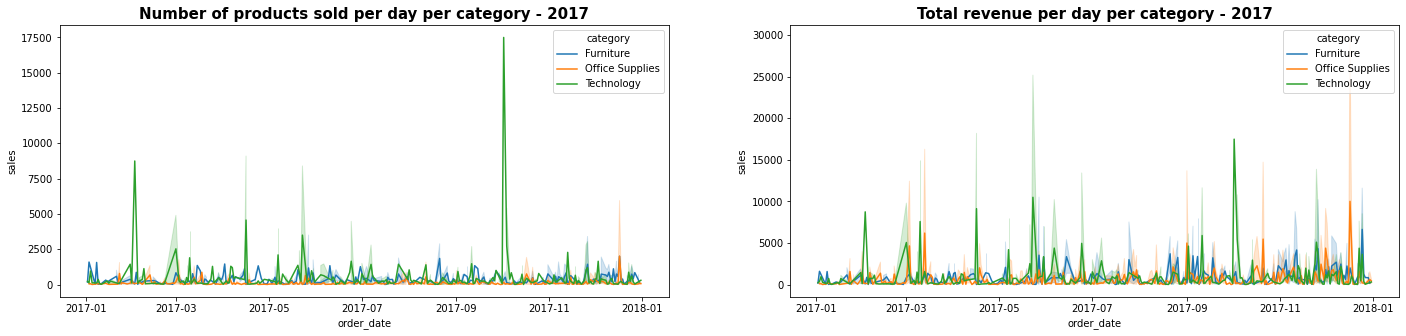

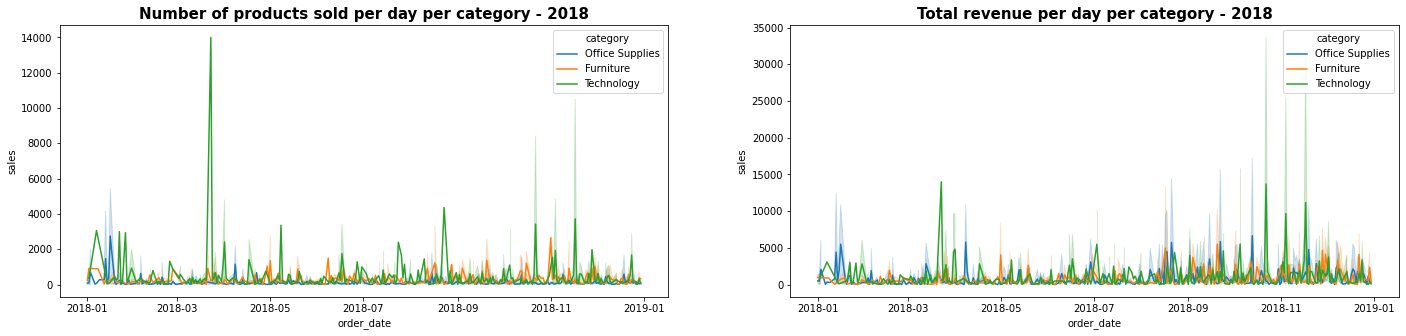

In [15]:
for i in sorted(data["year"].unique()):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(24,5))
    ax1 = sns.lineplot(x="order_date",y="sales",data=data[data["year"] == i],hue="category",ax=ax1)
    ax1.set_title(f"Number of products sold per day per category - {i}")
    ax2 = sns.lineplot(x="order_date",y="sales",data=data[data["year"] == i],hue="category",estimator=sum,ax=ax2)
    ax2.set_title(f"Total revenue per day per category - {i}")
    plt.show()

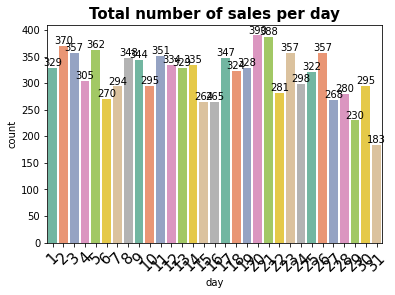

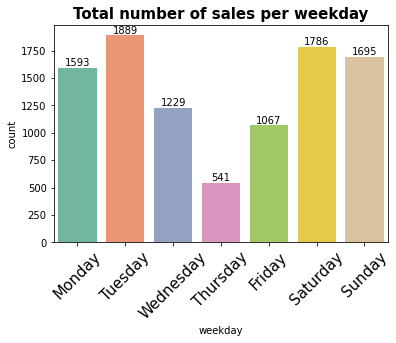

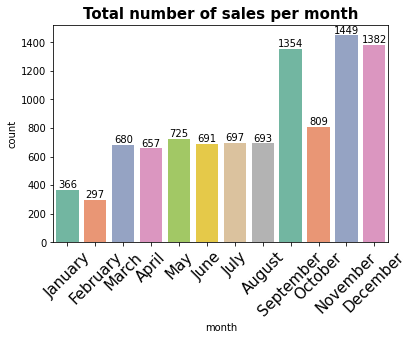

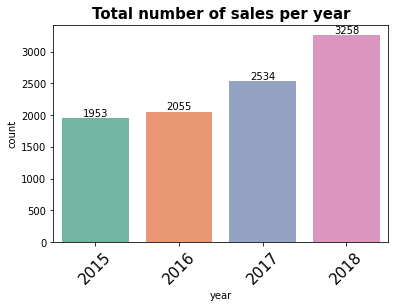

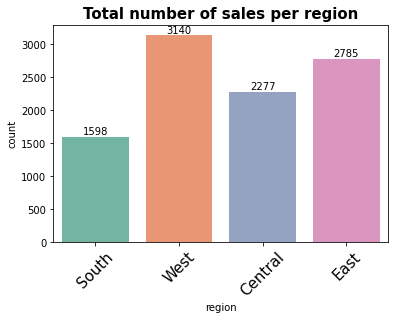

In [16]:
for i in ["day","weekday","month","year","region"]:
    zz = sns.countplot(x=i,data=data,palette="Set2")
    zz.bar_label(zz.containers[0])
    plt.xticks(fontsize=15)
    plt.title(f"Total number of sales per {i}")
    plt.xticks(rotation=45)
    plt.show()

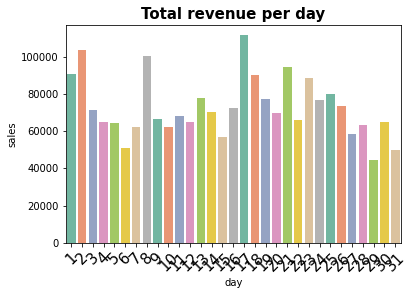

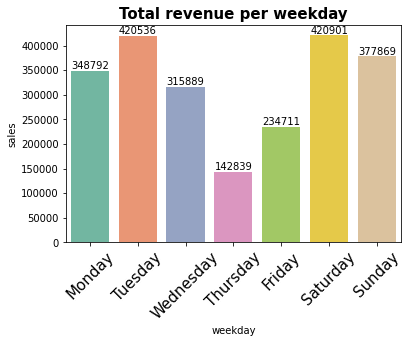

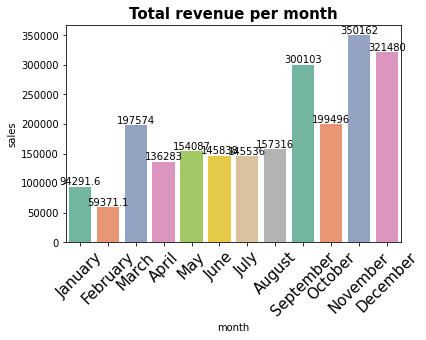

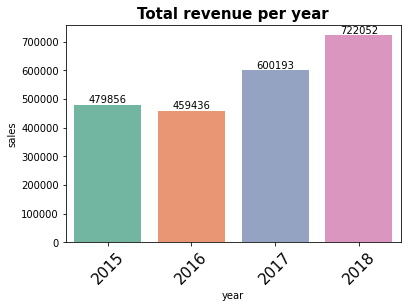

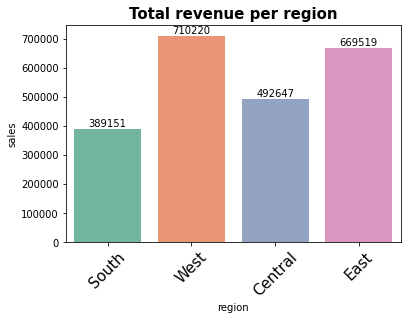

In [17]:
for i in ["day","weekday","month","year","region"]:
    zz = sns.barplot(x=i,y="sales",data=data,palette="Set2",estimator=sum,ci=False)
    if i != "day":
        zz.bar_label(zz.containers[0])
    plt.xticks(fontsize=15)
    plt.title(f"Total revenue per {i}")
    plt.xticks(rotation=45)
    plt.show()

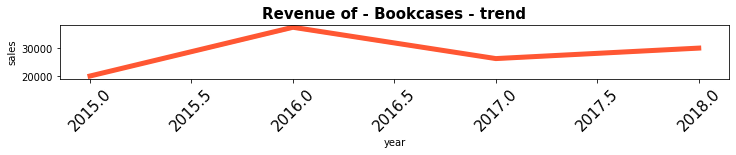

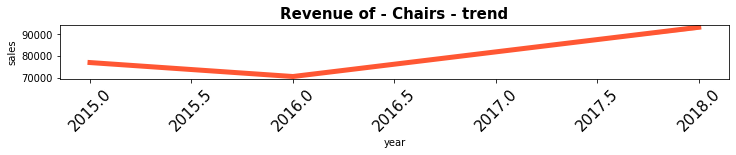

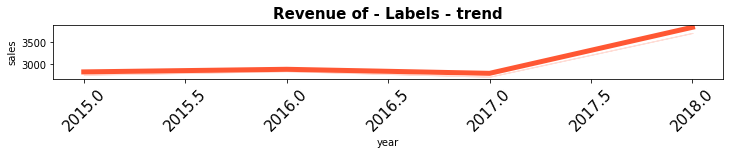

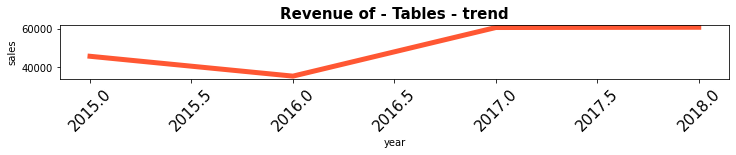

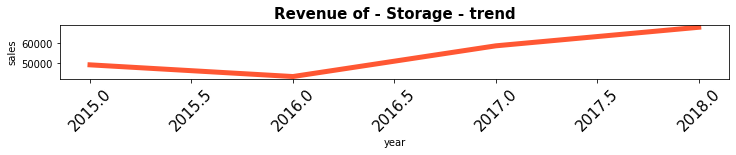

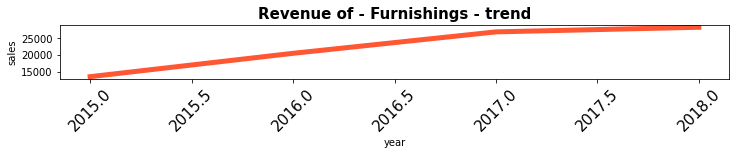

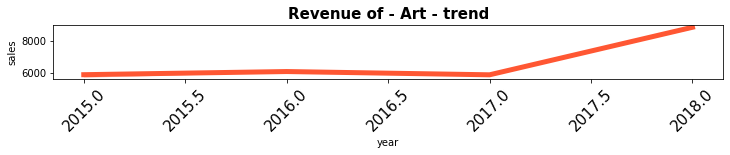

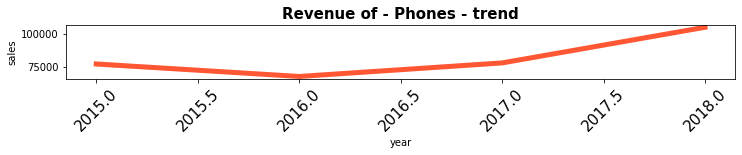

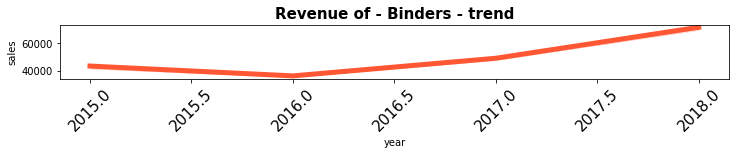

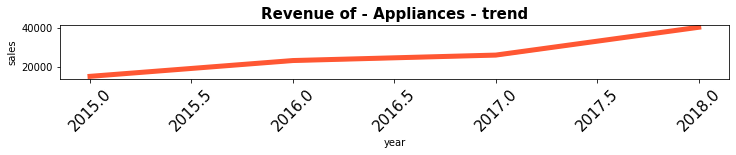

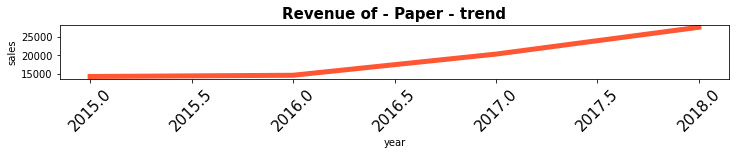

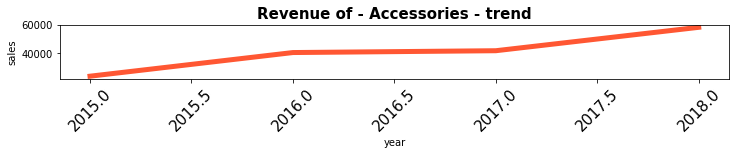

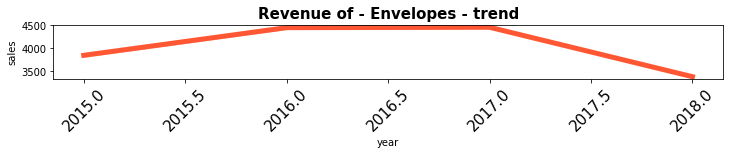

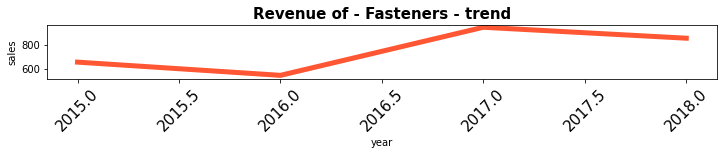

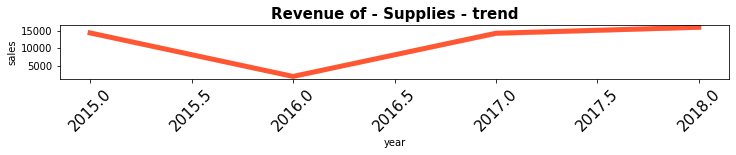

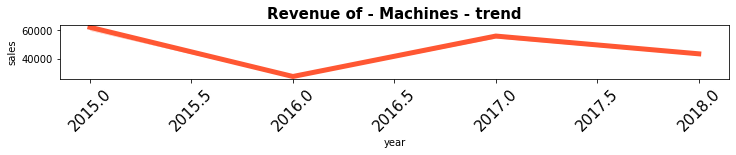

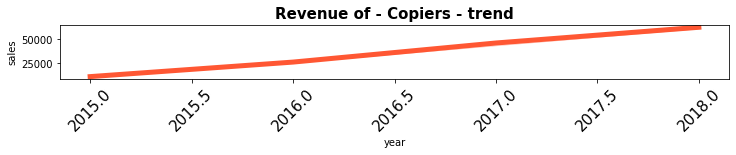

In [18]:
for i in data["sub_category"].unique():
    plt.figure(figsize=(12,1))
    zz = sns.lineplot(x="year",y="sales",data=data[data["sub_category"] == i],palette="Set2",estimator="sum",linewidth=5, ci=False,color="#FF5733")
    plt.xticks(fontsize=15)
    plt.title(f"Revenue of - {i} - trend")
    plt.xticks(rotation=45)
    plt.show()

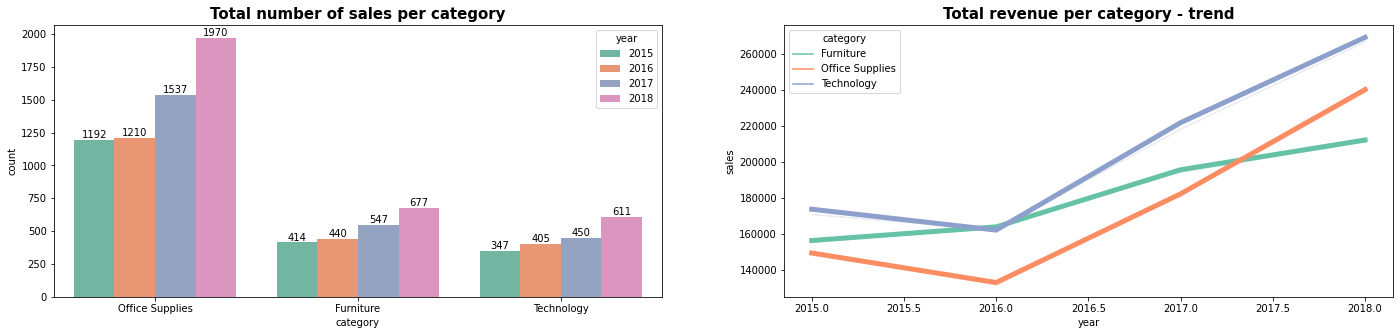

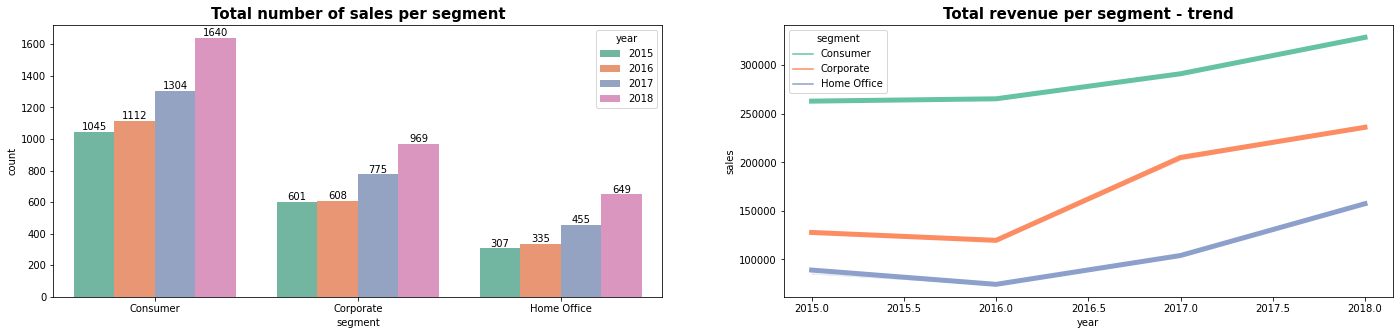

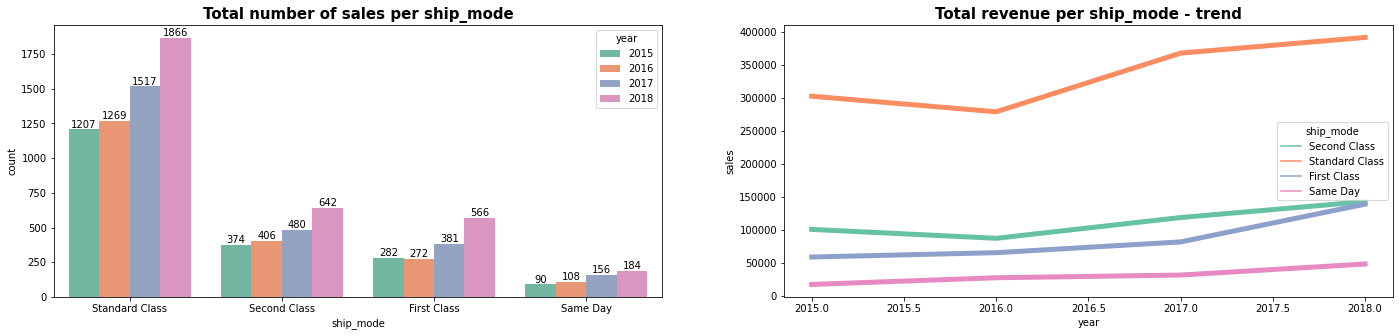

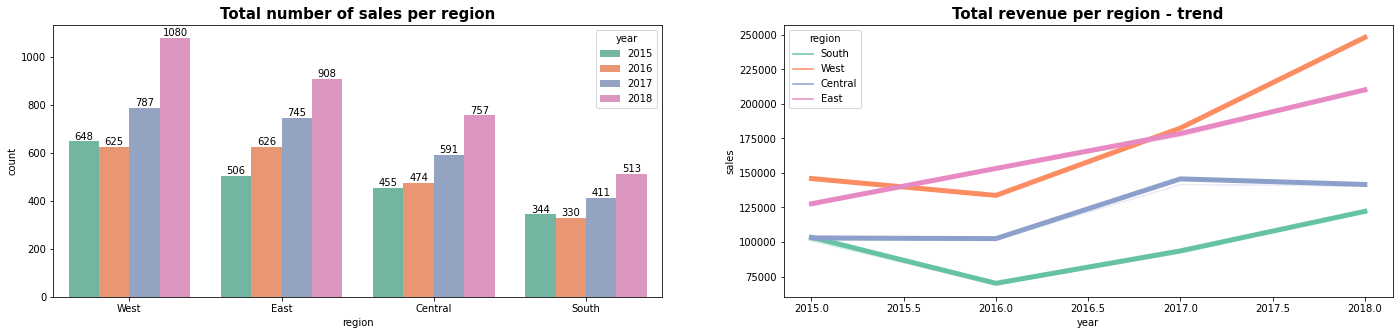

In [19]:
for i in ["category","segment","ship_mode","region"]:
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(24,5))
    ax1 = sns.countplot(x=i,data=data,palette="Set2",order=data.groupby(i)["order_id"].count().reset_index().sort_values(by="order_id",ascending=False)[i],hue="year", ax=ax1)
    ax1.set_title(f"Total number of sales per {i}")
    for x in range(0,len(ax1.containers)):
        ax1.bar_label(ax1.containers[x])
    ax2 = sns.lineplot(x="year",y="sales",data=data,hue=i,palette="Set2",estimator="sum",linewidth=5, ci=False,ax=ax2)
    ax2.set_title(f"Total revenue per {i} - trend")
    plt.show()

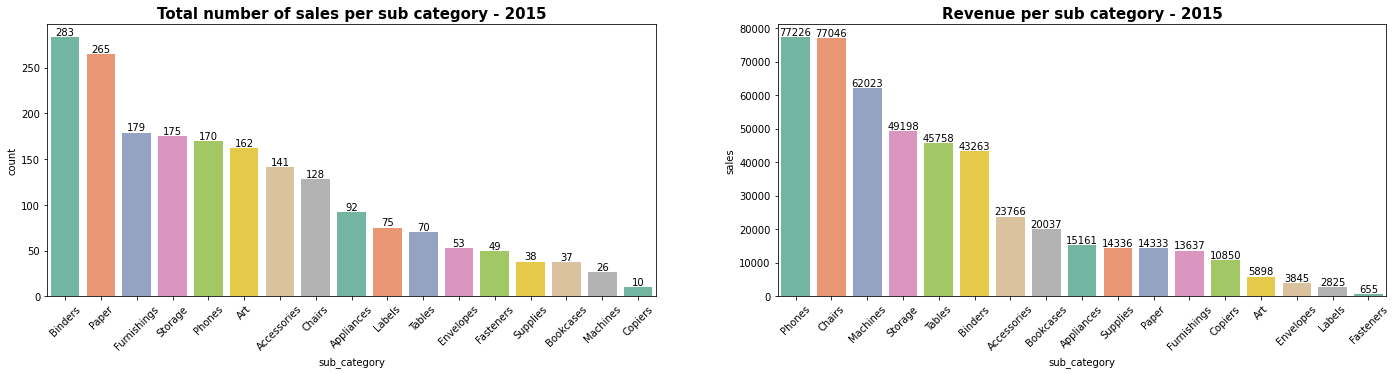

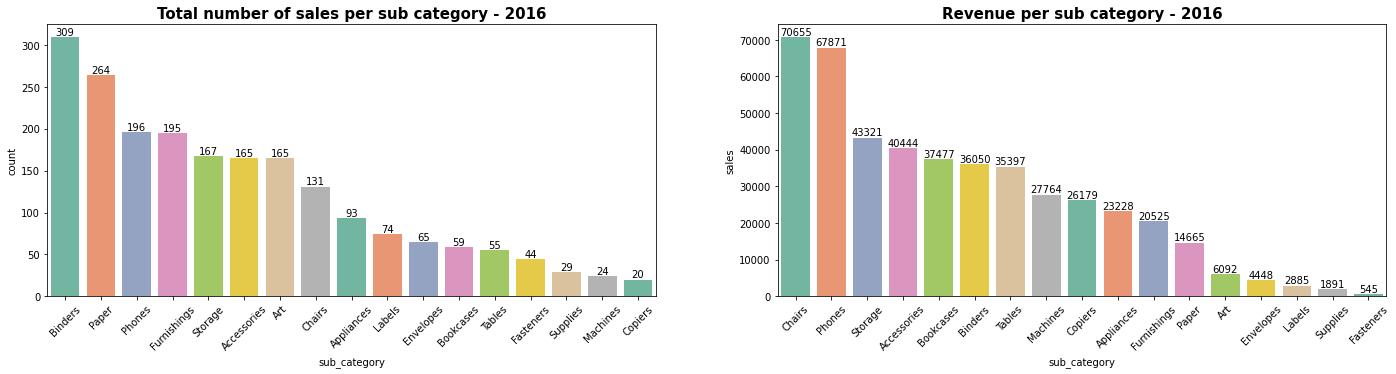

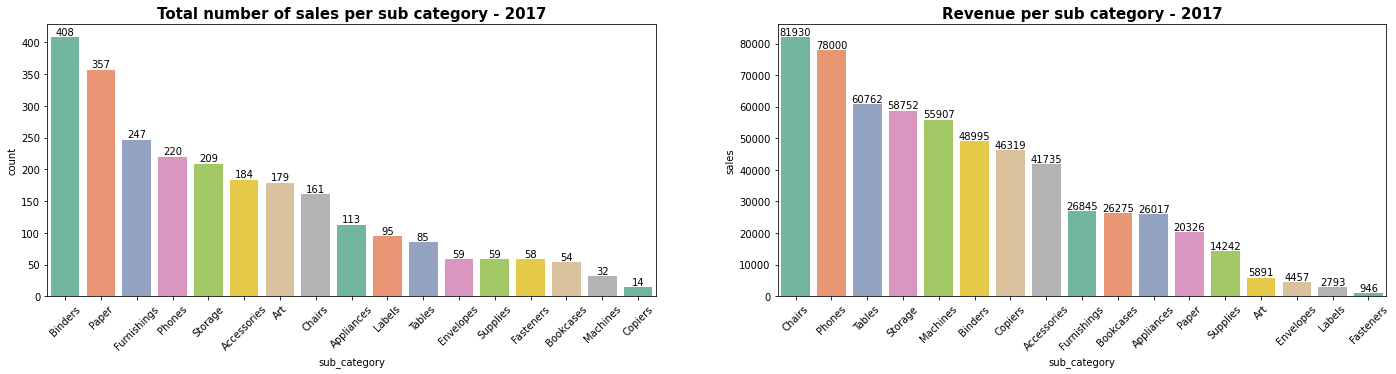

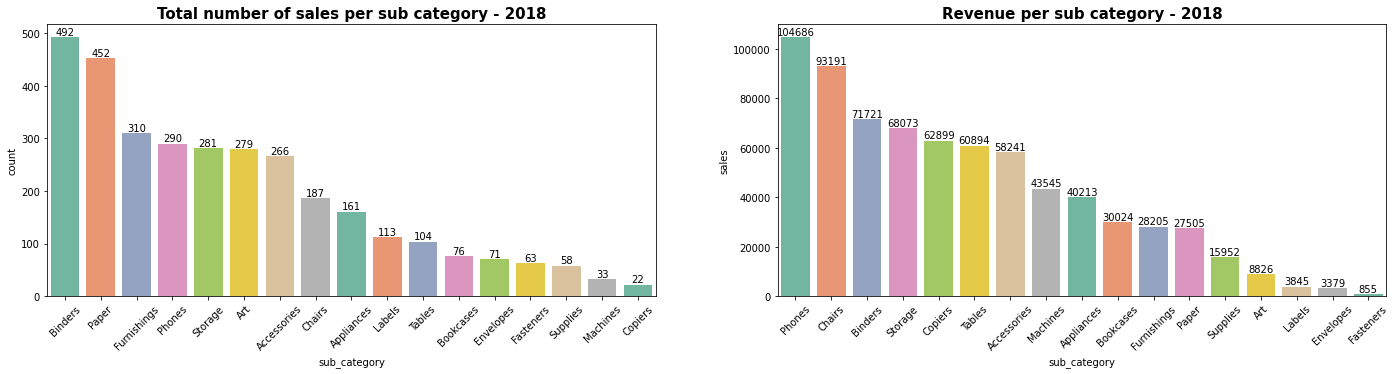

In [20]:
for i in sorted(data["year"].unique()):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(24,5))
    ax1 = sns.countplot(x="sub_category",data=data[data["year"] == i],order=data[data["year"] == i].groupby("sub_category")["row_id"].count().sort_values(ascending=False).to_frame().reset_index()["sub_category"],palette="Set2", ax=ax1)
    ax1.set_title(f"Total number of sales per sub category - {i}")
    ax1.tick_params(axis="x", rotation=45) 
    for x in range(0,len(ax1.containers)):
        ax1.bar_label(ax1.containers[x])
    ax2 = sns.barplot(x="sub_category",y="sales",data=round(data[data["year"] == i].groupby("sub_category")["sales"].sum().to_frame().reset_index().sort_values(by="sales",ascending=False)),palette="Set2", ax=ax2)
    ax2.set_title(f"Revenue per sub category - {i}")
    ax2.tick_params(axis="x", rotation=45) 
    for x in range(0,len(ax2.containers)):
        ax2.bar_label(ax2.containers[x])
    plt.show()

In [21]:
# TOP 10 MOST SELLING PRODUCTS
best_products = data.groupby("product_id").agg(sales_count=("row_id","count"),revenue=("sales","sum"),average=("sales","mean")).sort_values(by="sales_count",ascending=False).head(10).reset_index()
best_products["percentage_revenue"] = (best_products["revenue"]/(data["sales"].sum()))*100
best_products

product_id  sales_count    revenue     average  percentage_revenue
0  OFF-PA-10001970           19   2167.348  114.070947            0.095835
1  TEC-AC-10003832           18  11203.756  622.430889            0.495405
2  FUR-FU-10004270           16    426.560   26.660000            0.018862
3  TEC-AC-10003628           15   1409.530   93.968667            0.062326
4  FUR-CH-10002647           15   3641.274  242.751600            0.161009
5  TEC-AC-10002049           15  13756.536  917.102400            0.608283
6  FUR-CH-10002880           14   5436.158  388.297000            0.240375
7  OFF-BI-10001524           14    780.456   55.746857            0.034510
8  OFF-PA-10002377           14   1004.652   71.760857            0.044423
9  OFF-BI-10004632           14   5535.593  395.399500            0.244771

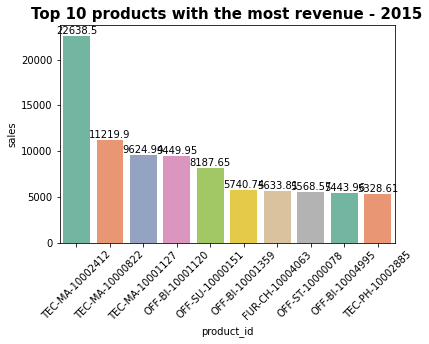

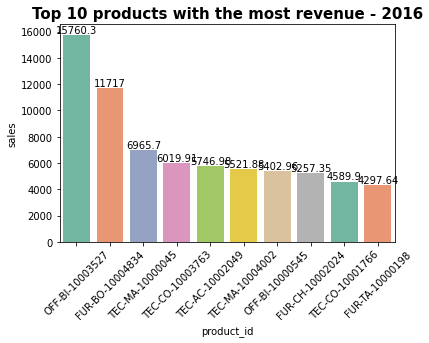

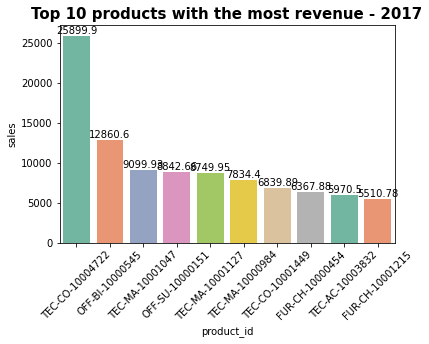

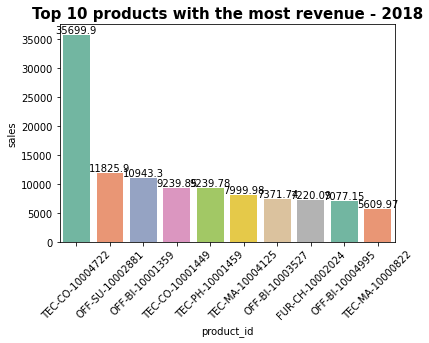

In [22]:
for i in sorted(data["year"].unique()):
    zz = sns.barplot(x="product_id",y="sales",data=data[data["year"] == i].groupby("product_id")["sales"].sum().to_frame().reset_index().sort_values(by="sales",ascending=False).head(10),palette="Set2")
    zz.bar_label(zz.containers[0])
    plt.xticks(rotation=45)
    plt.title(f"Top 10 products with the most revenue - {i}")
    plt.show()

In [23]:
# BEST CITY PER CATEGORY
data.groupby(["city","category"])["sales"].sum().to_frame().sort_values(by="sales",ascending=False).reset_index().drop_duplicates(subset=["category"])

city         category       sales
0  New York City       Technology  108980.136
1  New York City        Furniture   74822.885
3  New York City  Office Supplies   68659.526

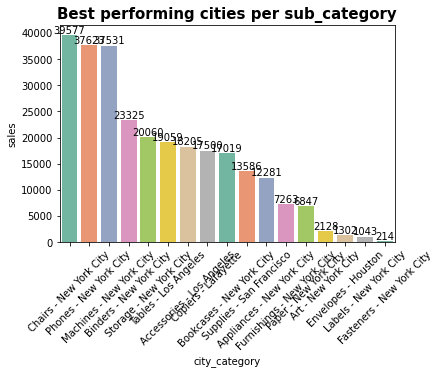

In [24]:
best_per_category = round(data.groupby(["city","sub_category"])["sales"].sum().to_frame().sort_values(by="sales",ascending=False).reset_index().drop_duplicates(subset=["sub_category"]))
best_per_category["city_category"] = best_per_category["sub_category"] + " - " + best_per_category["city"]

zz = sns.barplot(x="city_category",y="sales",data=best_per_category,palette="Set2")
zz.bar_label(zz.containers[0])
plt.xticks(rotation=45)
plt.title(f"Best performing cities per sub_category")
plt.show()

In [25]:
# BEST REVENUE PER DAY
data.groupby("order_date").agg(best_revenue=("sales","sum"),count=("sales","count")).sort_values(by="best_revenue",ascending=False)

best_revenue  count
order_date                     
2015-03-18     28106.716     11
2017-10-02     18452.972      7
2018-10-22     15158.877     12
2018-03-23     14816.068      8
2015-09-08     14228.428     27
...                  ...    ...
2015-10-01         4.710      1
2015-06-24         4.272      1
2015-01-28         3.928      1
2018-07-12         3.816      1
2016-07-19         2.025      1

[1230 rows x 2 columns]

In [26]:
from selenium.webdriver import Chrome 
from bs4 import BeautifulSoup 
import time

url = "https://www.scouting.org/resources/los/states/"
driver = Chrome(executable_path="C://Kiki/chromedriver.exe")
driver.get(url)
time.sleep(5)

In [27]:
soup = BeautifulSoup(driver.page_source,"html.parser")
driver.quit()

states_ab = soup.find("div",class_="table-responsive").tbody.find_all("tr")

states_abb = pd.DataFrame(columns=["state","ab"])

for i in range(1,len(states_ab)):
    states_abb.loc[len(states_abb)] = [states_ab[i].find_all("td")[0].text, states_ab[i].find_all("td")[2].text]

data = pd.merge(left=data,right=states_abb,left_on="state",right_on="state",how="left")

In [28]:
fig = px.choropleth(locations=data.groupby(["ab"])["sales"].sum().to_frame().reset_index()["ab"], locationmode="USA-states", color=data.groupby(["ab"])["sales"].sum().to_frame().reset_index()["sales"], scope="usa",title="Revenue per state - US")
fig.add_scattergeo(
    locations=data.groupby(["ab"])["sales"].sum().to_frame().reset_index()["ab"],
    locationmode="USA-states", 
    text=data.groupby(["ab"])["sales"].sum().to_frame().reset_index()["ab"],
    mode='text',
)
fig.show()

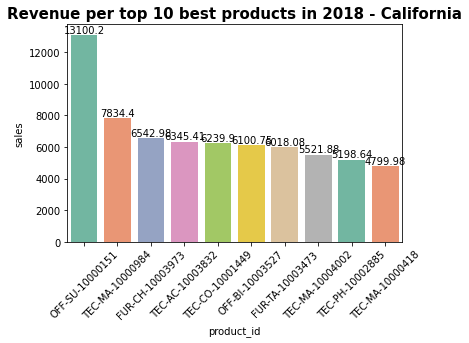

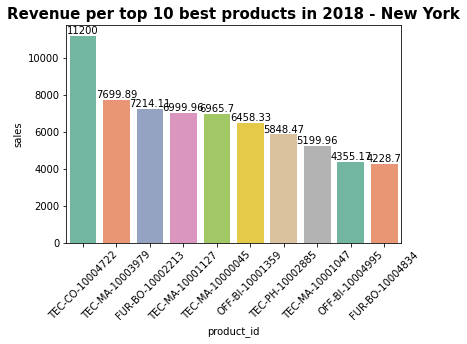

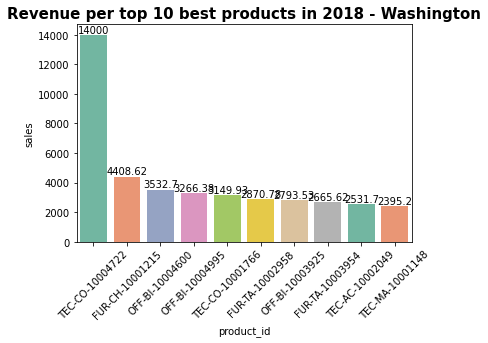

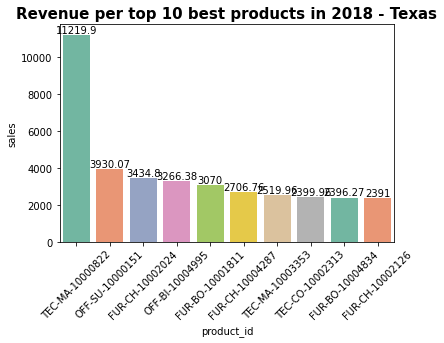

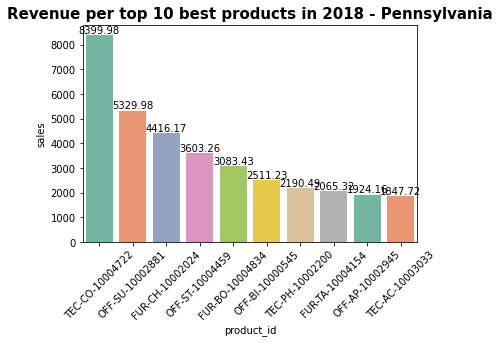

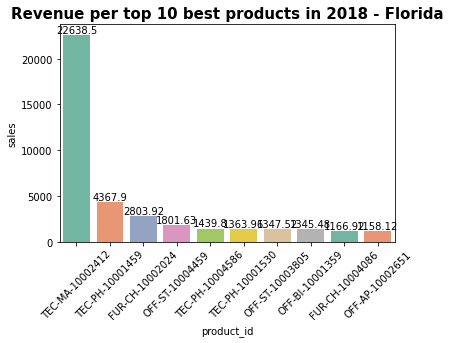

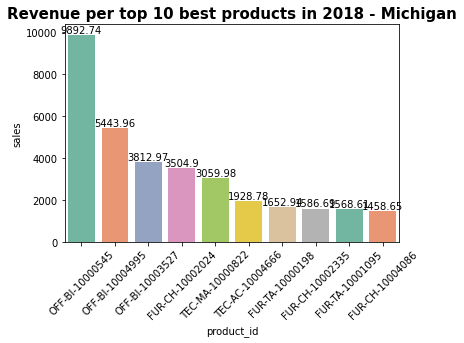

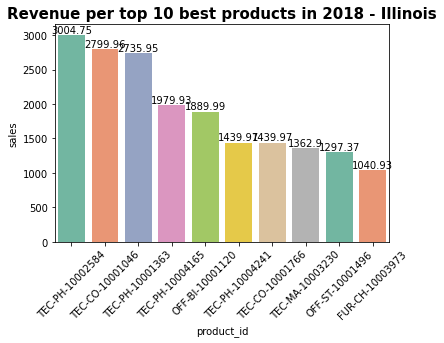

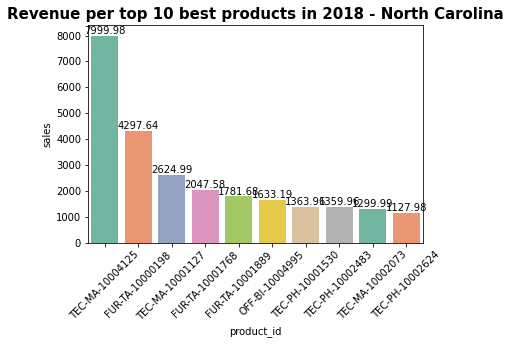

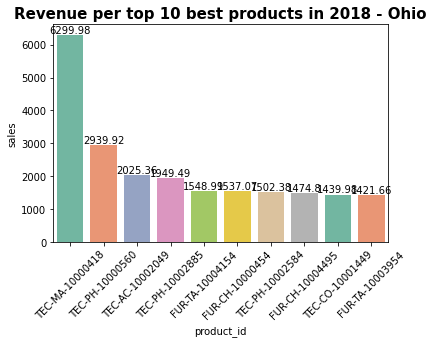

In [29]:
best_states = data[data["year"] == 2018].groupby("state")["sales"].sum().sort_values(ascending=False).reset_index().head(10)["state"].unique()
best_states

for i in best_states:
    zz = sns.barplot(x="product_id",y="sales",data=data[data["state"] == i].groupby("product_id")["sales"].sum().to_frame().reset_index().sort_values(by="sales",ascending=False).head(10),palette="Set2")
    zz.bar_label(zz.containers[0])
    plt.xticks(rotation=45)
    plt.title(f"Revenue per top 10 best products in 2018 - {i}")
    plt.show()

Order ID with the most products bought is CA-2018-100111


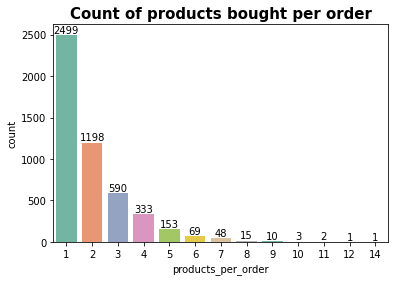

In [30]:
# COUNT OF PRODUCTS BOUGHT PER ONE ORDER
print("Order ID with the most products bought is {}".format(data.groupby("order_id").agg(products_per_order=("row_id","count")).reset_index().value_counts().to_frame().sort_values(by="products_per_order",ascending=False).reset_index()["order_id"][0]))
zz = sns.barplot(x="products_per_order",y="count",data=data.groupby("order_id").agg(products_per_order=("row_id","count")).value_counts().to_frame().reset_index().sort_values(by="products_per_order",ascending=False).rename(columns={0: "count"}),palette="Set2")
zz.bar_label(zz.containers[0])
plt.title("Count of products bought per order")
plt.show()

In [31]:
# ORDER WITH THE MOST PRODUCTS
data[data["order_id"] == "CA-2018-100111"].head()

row_id        order_id order_date  ship_date       ship_mode  \
6090    6091  CA-2018-100111 2018-09-20 2018-09-26  Standard Class   
6091    6092  CA-2018-100111 2018-09-20 2018-09-26  Standard Class   
6092    6093  CA-2018-100111 2018-09-20 2018-09-26  Standard Class   
6093    6094  CA-2018-100111 2018-09-20 2018-09-26  Standard Class   
6094    6095  CA-2018-100111 2018-09-20 2018-09-26  Standard Class   

     customer_id customer_name   segment        country           city  \
6090    SV-20365   Seth Vernon  Consumer  United States  New York City   
6091    SV-20365   Seth Vernon  Consumer  United States  New York City   
6092    SV-20365   Seth Vernon  Consumer  United States  New York City   
6093    SV-20365   Seth Vernon  Consumer  United States  New York City   
6094    SV-20365   Seth Vernon  Consumer  United States  New York City   

         state postal_code region       product_id         category  \
6090  New York       10035   East  FUR-CH-10003846        Furniture   
6091  New York       10035   East  TEC-AC-10002647       Technology   
6092  New York       10035   East  OFF-PA-10000807  Office Supplies   
6093  New York       10035   East  TEC-AC-10001465       Technology   
6094  New York       10035   East  OFF-ST-10000615  Office Supplies   

     sub_category                                       product_name    sales  \
6090       Chairs                         Hon Valutask Swivel Chairs  272.646   
6091  Accessories  Logitech Wireless Boombox Speaker - portable -...  212.800   
6092        Paper  TOPS "Important Message" Pads, Canary, 4-1/4 x...   38.520   
6093  Accessories               SanDisk Cruzer 64 GB USB Flash Drive   72.640   
6094      Storage  SimpliFile Personal File, Black Granite, 15w x...   45.400   

     time_shipped   weekday  day      month  year  ab  
6090       6 days  Thursday   20  September  2018  NY  
6091       6 days  Thursday   20  September  2018  NY  
6092       6 days  Thursday   20  September  2018  NY  
6093       6 days  Thursday   20  September  2018  NY  
6094       6 days  Thursday   20  September  2018  NY

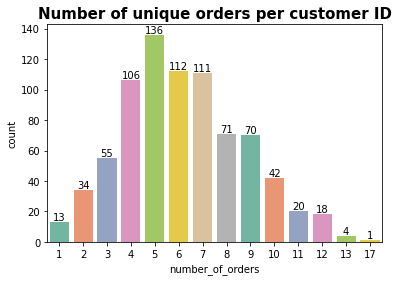

In [32]:
# HOW MANY CUSTOMERS MADE AN ORDER MORE THAN ONCE?
customers = data.drop_duplicates(subset=["order_id"]).groupby(["customer_id"])["order_id"].count().to_frame().reset_index().sort_values(by="order_id",ascending=False).rename(columns={"order_id":"number_of_orders"})
sns.countplot(x="number_of_orders",data=customers)
zz = sns.countplot(x="number_of_orders",data=customers,palette="Set2")
zz.bar_label(zz.containers[0])
plt.title("Number of unique orders per customer ID")
plt.show()

In [33]:
# MOST UNIQUE ORDERS PER CUSTOMER
data.drop_duplicates(subset=["order_id"]).groupby(["customer_name","customer_id"])["order_id"].count().to_frame().reset_index().sort_values(by="order_id",ascending=False)

customer_name customer_id  order_id
259           Emily Phan    EP-13915        17
145  Chloris Kastensmidt    CK-12205        13
381           Joel Eaton    JE-15745        13
791     Zuschuss Carroll    ZC-21910        13
586      Patrick Gardner    PG-18820        13
..                   ...         ...       ...
455         Lela Donovan    LD-16855         1
741        Theresa Coyne    TC-21145         1
584    Patricia Hirasaki    PH-18790         1
545      Mitch Gastineau    MG-18205         1
53     Anthony O'Donnell    AO-10810         1

[793 rows x 3 columns]

In [34]:
print("Revenue from customers with 10 or more unique orders is:",data["sales"][data["customer_id"].isin(list(customers["customer_id"][customers["number_of_orders"] >= 10]))].sum())
print("Which is {}% of the total revenue".format(round((data["sales"][data["customer_id"].isin(list(customers["customer_id"][customers["number_of_orders"] >= 10]))].sum()/(data["sales"].sum()))*100)))

Revenue from customers with 10 or more unique orders is: 426324.5372
Which is 19% of the total revenue


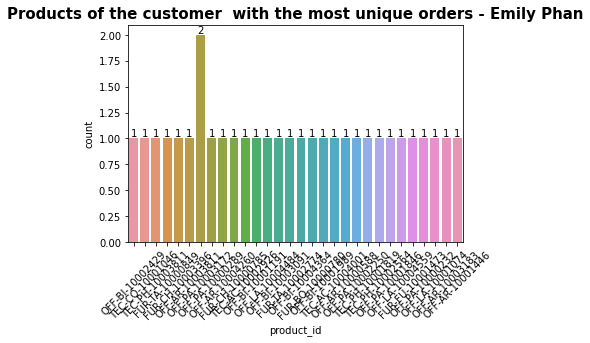

In [35]:
zz = sns.countplot(x="product_id",data=data[data["customer_id"] == "EP-13915"])
zz.bar_label(zz.containers[0])
plt.xticks(rotation=45)
plt.title(f"Products of the customer  with the most unique orders - Emily Phan")
plt.show()

In [36]:
# MOST PRODUCTS BOUGHT PER CUSTOMER
data.groupby(["customer_name","customer_id"])["order_id"].count().to_frame().reset_index().sort_values(by="order_id",ascending=False).head(10)

customer_name customer_id  order_id
787        William Brown    WB-21850        35
502         Matt Abelman    MA-17560        34
595           Paul Prost    PP-18955        34
387             John Lee    JL-15835        33
391     Jonathan Doherty    JD-15895        32
689          Seth Vernon    SV-20365        32
145  Chloris Kastensmidt    CK-12205        32
791     Zuschuss Carroll    ZC-21910        31
259           Emily Phan    EP-13915        31
60        Arthur Prichep    AP-10915        31

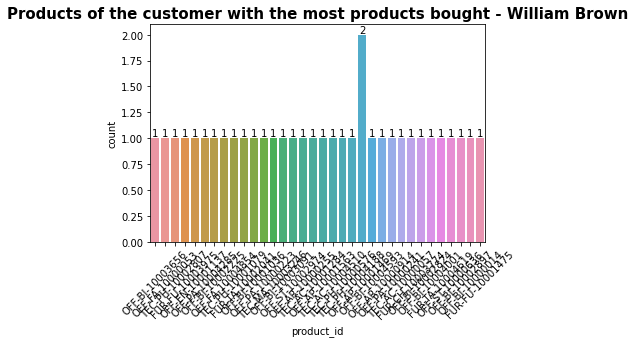

In [37]:
zz = sns.countplot(x="product_id",data=data[data["customer_id"] == "WB-21850"])
zz.bar_label(zz.containers[0])
plt.xticks(rotation=45)
plt.title(f"Products of the customer with the most products bought - William Brown")
plt.show()

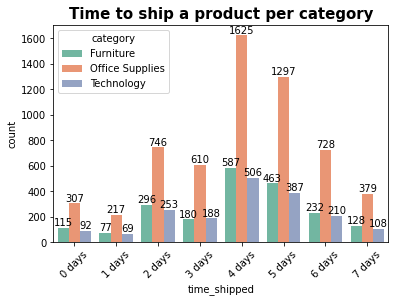

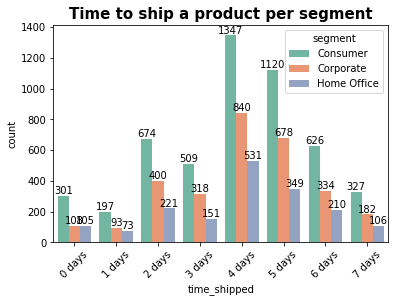

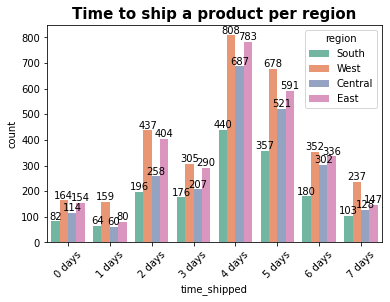

In [38]:
# TIME TO SHIP A PRODUCT PER CATEGORY
for i in ["category","segment","region"]:
    zz = sns.countplot(x=data["time_shipped"].astype("str"),hue=data[i],order=sorted(data["time_shipped"].astype("str").unique()),palette="Set2")
    for x in range(0,len(zz.containers)):
        zz.bar_label(zz.containers[x])
    plt.xticks(rotation=45)
    plt.title(f"Time to ship a product per {i}")
    plt.show()

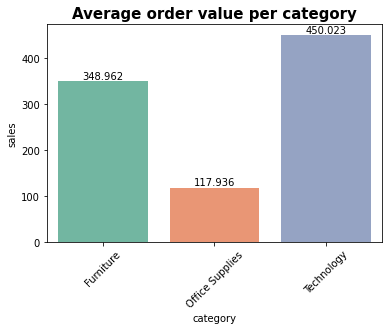

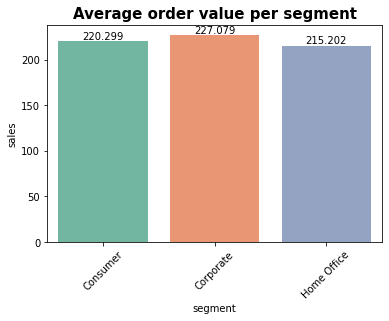

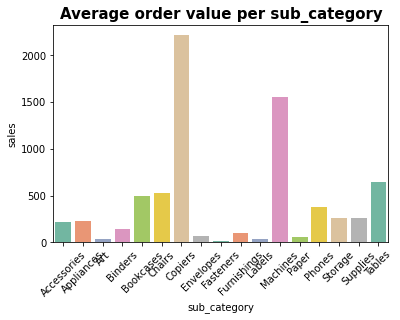

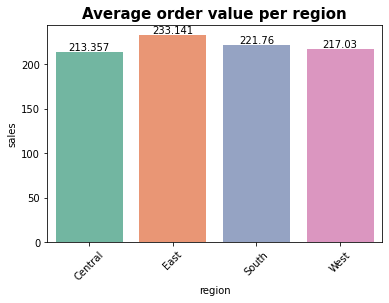

In [39]:
# AVERAGE ORDER VALUE
for i in ["category","segment","sub_category","region"]:
    zz = sns.barplot(x=i, y="sales", data=data.groupby([i,"order_id"])["sales"].mean().to_frame().reset_index().groupby(i)["sales"].mean().to_frame().reset_index(),palette="Set2")
    if i != "sub_category":
        for x in range(0,len(zz.containers)):
            zz.bar_label(zz.containers[x])
    plt.xticks(rotation=45)
    plt.title(f"Average order value per {i}")
    plt.show()

In [40]:
# WHICH SUB_CATEGORIES TAKE 7 DAYS TO SHIP MOST OFTEN
data["sub_category"][data["time_shipped"] == "7 days"].value_counts().to_frame()

sub_category
Binders               111
Paper                  66
Art                    60
Furnishings            55
Phones                 52
Storage                44
Accessories            42
Chairs                 39
Appliances             28
Tables                 22
Labels                 21
Supplies               18
Fasteners              16
Envelopes              15
Bookcases              12
Machines               10
Copiers                 4

In [41]:
states = data.groupby("state").agg(revenue=("sales","sum"), products_sold=("sales","count")).reset_index()

states["percentage"] = (states["products_sold"].apply(lambda x: x/states["products_sold"].sum()))*100
states.head()

state      revenue  products_sold  percentage
0     Alabama   19510.6400             61    0.622449
1     Arizona   35272.6570            223    2.275510
2    Arkansas   11678.1300             60    0.612245
3  California  446306.4635           1946   19.857143
4    Colorado   31841.5980            179    1.826531

In [42]:
url = "https://worldpopulationreview.com/states"
driver = Chrome(executable_path="C://Kiki/chromedriver.exe")
driver.get(url)
time.sleep(5)

In [43]:
soup = BeautifulSoup(driver.page_source,"html.parser")
driver.quit()

In [44]:
rows = soup.find("table",class_="jsx-364991517 table is-striped is-hoverable is-fullwidth tp-table-body is-narrow").tbody.find_all("tr")

In [45]:
states_scraped = pd.DataFrame(columns=["state","population_2022","percentage_usa"])

for i in range(0,len(rows)):
    states_scraped.loc[len(states_scraped)] = [rows[i].find("a").text.strip(), rows[i].find_all("td")[2].text.strip(),rows[i].find_all("td")[7].text.strip()]

states_scraped.head()

state population_2022 percentage_usa
0    California      39,995,077         11.93%
1         Texas      29,945,493          8.93%
2       Florida      22,085,563          6.59%
3      New York      20,365,879          6.07%
4  Pennsylvania      13,062,764          3.90%

In [46]:
states_merged = pd.merge(left=states,right=states_scraped,left_on="state",right_on="state",how="inner")

states_merged["percentage_usa"] = states_merged["percentage_usa"].str.replace("%","").astype("float")
states_merged["percentage_diff"] = states_merged["percentage"] - states_merged["percentage_usa"]

states_merged.head()

state      revenue  products_sold  percentage population_2022  \
0     Alabama   19510.6400             61    0.622449       5,073,187   
1     Arizona   35272.6570            223    2.275510       7,303,398   
2    Arkansas   11678.1300             60    0.612245       3,030,646   
3  California  446306.4635           1946   19.857143      39,995,077   
4    Colorado   31841.5980            179    1.826531       5,922,618   

   percentage_usa  percentage_diff  
0            1.51        -0.887551  
1            2.18         0.095510  
2            0.90        -0.287755  
3           11.93         7.927143  
4            1.77         0.056531

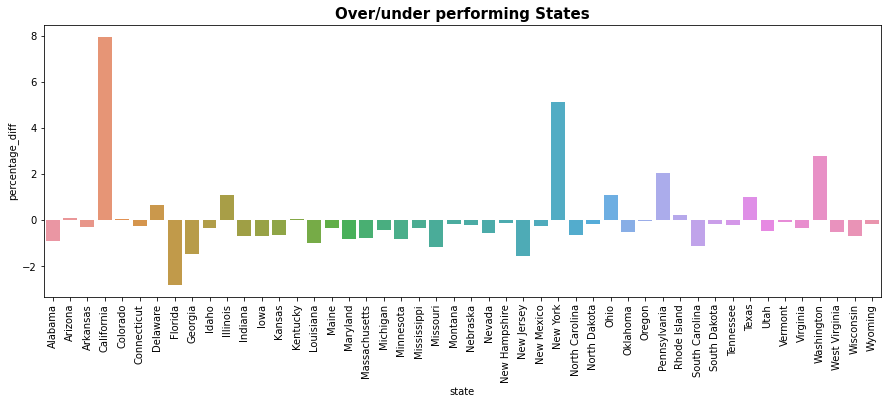

3 best over performing states
          state  percentage_diff
3   California         7.927143
29    New York         5.123878
44  Washington         2.782857 

3 worst under performing states
          state  percentage_diff
7      Florida        -2.783878
27  New Jersey        -1.555102
8      Georgia        -1.453878


In [47]:
plt.figure(figsize=(15,5))
sns.barplot(x="state",y="percentage_diff",data=states_merged)
zz = sns.barplot(x="state",y="percentage_diff",data=states_merged)
plt.xticks(rotation=90)
plt.title(f"Over/under performing States")
plt.show()

print("3 best over performing states\n",states_merged[["state","percentage_diff"]].sort_values(by="percentage_diff",ascending=False).head(3),"\n")
print("3 worst under performing states\n",states_merged[["state","percentage_diff"]].sort_values(by="percentage_diff",ascending=True).head(3))

In [48]:
data1 = data
data1["product_name"] = data1["product_name"].str.replace(",","")

duplicated = data1[data1["order_id"].duplicated(keep=False)]
duplicated.head()

row_id        order_id order_date  ship_date       ship_mode customer_id  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
5       6  CA-2015-115812 2015-06-09 2015-06-14  Standard Class    BH-11710   

     customer_name   segment        country             city       state  \
0      Claire Gute  Consumer  United States        Henderson    Kentucky   
1      Claire Gute  Consumer  United States        Henderson    Kentucky   
3   Sean O'Donnell  Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell  Consumer  United States  Fort Lauderdale     Florida   
5  Brosina Hoffman  Consumer  United States      Los Angeles  California   

  postal_code region       product_id         category sub_category  \
0       42420  South  FUR-BO-10001798        Furniture    Bookcases   
1       42420  South  FUR-CH-10000454        Furniture       Chairs   
3       33311  South  FUR-TA-10000577        Furniture       Tables   
4       33311  South  OFF-ST-10000760  Office Supplies      Storage   
5       90032   West  FUR-FU-10001487        Furniture  Furnishings   

                                        product_name     sales time_shipped  \
0                  Bush Somerset Collection Bookcase  261.9600       3 days   
1  Hon Deluxe Fabric Upholstered Stacking Chairs ...  731.9400       3 days   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775       7 days   
4                     Eldon Fold 'N Roll Cart System   22.3680       7 days   
5  Eldon Expressions Wood and Plastic Desk Access...   48.8600       5 days   

     weekday  day     month  year  ab  
0  Wednesday    8  November  2017  KY  
1  Wednesday    8  November  2017  KY  
3    Tuesday   11   October  2016  FL  
4    Tuesday   11   October  2016  FL  
5    Tuesday    9      June  2015  CA

In [49]:
duplicated["grouped"] = duplicated.groupby("order_id")["product_name"].transform(lambda x: ",".join(x))

df = duplicated[["order_id","grouped"]].drop_duplicates()

In [50]:
# WHICH PRODUCTS WERE SOLD TOGETHER THE MOST?

from collections import Counter
from itertools import combinations

count = Counter()

for row in df["grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))

pairs = count.most_common(10)

In [51]:
for key, value in pairs:
    print(key,value)

('Anker 36W 4-Port USB Wall Charger Travel Power Adapter for iPhone 5s 5c 5', 'Staples') 2
('Staples', 'Square Credit Card Reader 4 1/2" x 4 1/2" x 1" White') 2
('Sabrent 4-Port USB 2.0 Hub', 'Xerox 1881') 2
('Xerox 1881', 'GBC DocuBind P400 Electric Binding System') 2
('GBC ProClick 150 Presentation Binding System', 'Imation\xa0Secure+ Hardware Encrypted USB 2.0\xa0Flash Drive; 16GB') 2
('Imation\xa0Secure+ Hardware Encrypted USB 2.0\xa0Flash Drive; 16GB', 'Woodgrain Magazine Files by Perma') 2
('Advantus Rolling Storage Box', 'Great White Multi-Use Recycled Paper (20Lb. and 84 Bright)') 2
('Xerox 225', 'Xerox 1894') 2
('Insertable Tab Post Binder Dividers', 'GBC VeloBinder Manual Binding System') 2
('DAX Value U-Channel Document Frames Easel Back', 'Recycled Easel Ring Binders') 2
